In [30]:
import numpy as np
import pandas as pd
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

# 1

Load data, check types, missing values.

How many missing values ​​were found in the dataset?

In [31]:
cars = pd.read_csv('https://stepik.org/media/attachments/lesson/387691/cars.csv')

In [32]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [34]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# 2
Let's generate the first sign

Using the full name of the car is not the best option, so let's create a new attribute - the brand of the car (`company`). To do this, use the `CarName` column, split the cell values ​​by space and write the first element into the column. For example:

    'audi 100 ls' → 'audi'
    
How many unique car brands are found in the dataset? Remove the `CarName` column with the full name of the car from the dataset, as well as `car_ID`, they will not be useful for further analysis.

In [35]:
cars['CarName'].apply(lambda x : x.split(' '))

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [36]:
cars['company'] = cars['CarName'].apply(lambda x : x.split(' ')[0])

In [37]:
cars.company.nunique()

28

In [38]:
cars.drop('car_ID', axis='columns', inplace=True)

# 3
Now take a closer look at the unique values ​​of company. Some of them turned out to be wrong!

- 'maxda' → 'mazda'
- 'Nissan' → 'Nissan'
- 'porcshce' → 'porsche'
- 'toyota' → 'toyota'
- 'vokswagen' & 'vw' → 'volkswagen'

How many unique manufacturers are left in the end?

In [39]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [40]:
# to lower case to fix nissan
cars.company = cars.company.str.lower()

In [41]:
def fix_company(to_rep, how_rep):
    cars.company.replace(to_rep, how_rep, inplace=True)

In [42]:
fix_company('maxda','mazda')
fix_company('porcshce','porsche')
fix_company('toyouta','toyota')
fix_company('vokswagen','volkswagen')
fix_company('vw','volkswagen')

In [43]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [44]:
cars.company.nunique()

22

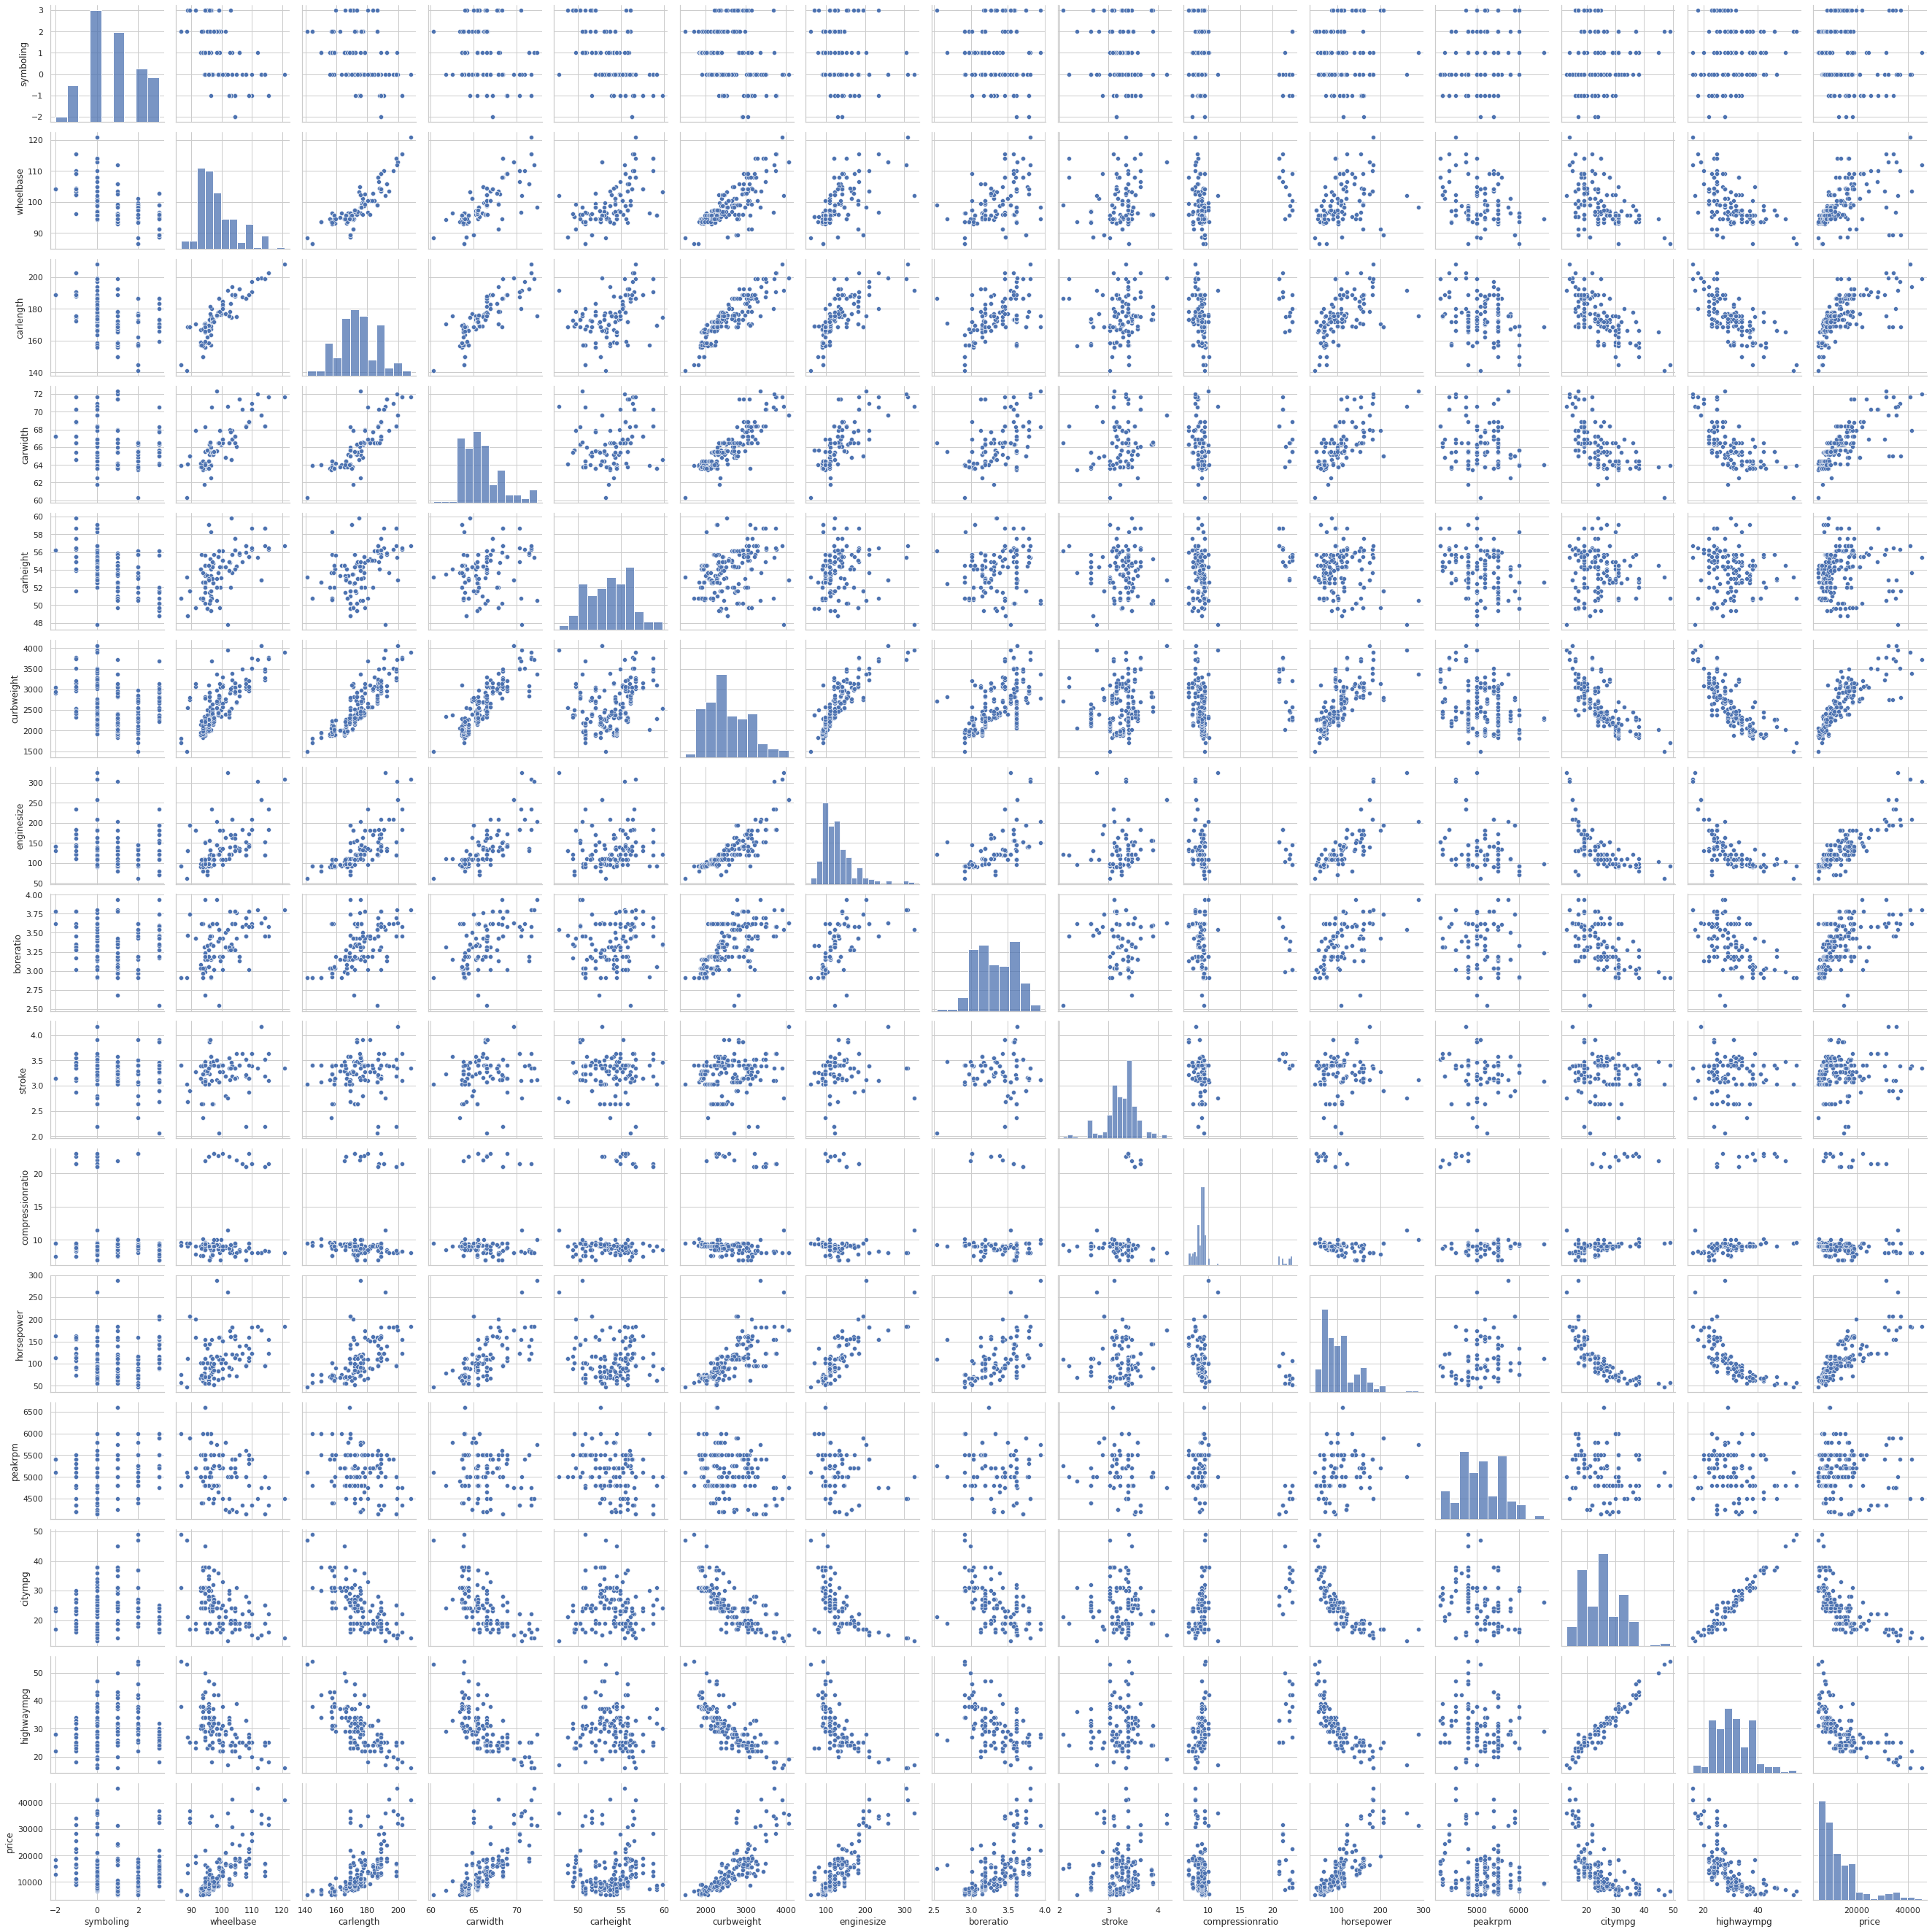

In [45]:
sns.pairplot(cars)
plt.show()

# 4

In order not to overload the model with a large number of predictors, we will leave only some of them:

    'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio' ','horsepower'
also not forgetting what we are predicting - `'price'`.

Then calculate the correlation between `price` and other variables. What is the correlation between `price` and `horsepower`? Round your answer to 2 decimal places.

In [81]:
cols_to_keep = ['company','fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase',
                'carlength','carwidth',
                'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']

In [82]:
cars.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [48]:
df = cars[cols_to_keep]

In [49]:
df.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


In [50]:
corr_mat = df.corr()
corr_mat["price"].sort_values(ascending=False).round(2)

price         1.00
enginesize    0.87
curbweight    0.84
horsepower    0.81
carwidth      0.76
carlength     0.68
wheelbase     0.58
boreratio     0.55
Name: price, dtype: float64

# 5
Last step in data preparation: linear regression in python can't handle categorical variables (object type in pandas), so let's use `pd.get_dummies()`. Usage example:

    df_dummy = pd.get_dummies(data=cars[[object_type_column_list]], drop_first = True)
Don't forget to add columns with variables of other types to the resulting dataset :)

How many columns are there in the dataset now?

Hint: `pd.concat([df_1, df_2], axis=1)`

In [51]:
df.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object

In [52]:
df_dummy = pd.get_dummies(data=df[['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']], 
                          drop_first = True)

In [53]:
df_dummy

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [54]:
cars_lr = pd.concat([df.drop(['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], axis='columns'),
                     df_dummy], axis=1)

In [55]:
cars_lr.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [56]:
cars_lr.shape

(205, 49)

In [57]:
#could have been shorter

pd.get_dummies(df, drop_first=True)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,0,0,...,1,0,0,0,0,0,1,0,0,0


#  6
First, let's build a small model with just one price predictor (price) - horsepower.

What percentage of variability does the resulting model explain? ($R^2$)

In [58]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
results = smf.ols('price ~ horsepower', cars_lr).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.48e-48
Time:                        10:34:02   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [60]:
#how to make intercept clearer
cars_lr["horsepower_cent"] = cars_lr["horsepower"] - cars_lr["horsepower"].mean()

results_cent = smf.ols('price ~ horsepower_cent', cars_lr).fit()
print(results_cent.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.48e-48
Time:                        10:34:02   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.328e+04    329.446     

In [61]:
1.328e+04

13280.0

In [62]:
cars_lr["horsepower"].mean()

104.1170731707317

In [63]:
cars_lr["horsepower_cent"]

0       6.882927
1       6.882927
2      49.882927
3      -2.117073
4      10.882927
         ...    
200     9.882927
201    55.882927
202    29.882927
203     1.882927
204     9.882927
Name: horsepower_cent, Length: 205, dtype: float64

In [64]:
cars_lr["horsepower_cent"].mean()

5.47637815854126e-15

In [65]:
cars_lr.drop("horsepower_cent", inplace=True, axis=1)

# 7
Now there are two models:

- model with all predictors
- model with all predictors, except car brands

Notice the changes in $R^2$, coefficients and their significance. Which model is best left?

In [66]:
X = cars_lr.drop(['price'], axis='columns')
y = cars_lr['price']

In [67]:
#don't forget the constant
X = sm.add_constant(X)

In [68]:
X

,const,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,1.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,109.1,188.8,68.9,2952,141,3.78,114,0,0,...,1,0,0,0,0,1,0,0,0,0
201,1.0,109.1,188.8,68.8,3049,141,3.78,160,0,0,...,1,0,0,0,0,1,0,0,0,0
202,1.0,109.1,188.8,68.9,3012,173,3.58,134,0,0,...,0,0,1,0,0,0,1,0,0,0
203,1.0,109.1,188.8,68.9,3217,145,3.01,106,0,0,...,1,0,0,0,0,0,1,0,0,0


In [69]:
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.86e-89
Time:                        10:34:02   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [70]:
cols_to_keep = cars_lr.columns[~cars_lr.columns.str.startswith('company_')]
cols_to_keep

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [71]:
X = cars_lr[cols_to_keep].drop('price', axis='columns')
y = cars_lr['price']

In [72]:
X = sm.add_constant(X)

In [73]:
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           9.86e-81
Time:                        10:34:02   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

### Finding sources of multicollinearity

In [74]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [75]:
vif_data

,feature,VIF
0,const,5462.989991
1,wheelbase,8.857746
2,carlength,12.440825
3,carwidth,9.524947
4,curbweight,28.188815
5,enginesize,28.003130
6,boreratio,7.094707
7,horsepower,14.094798
8,fueltype_gas,2.715837
9,aspiration_turbo,2.970921


### Make log transform dependent variable

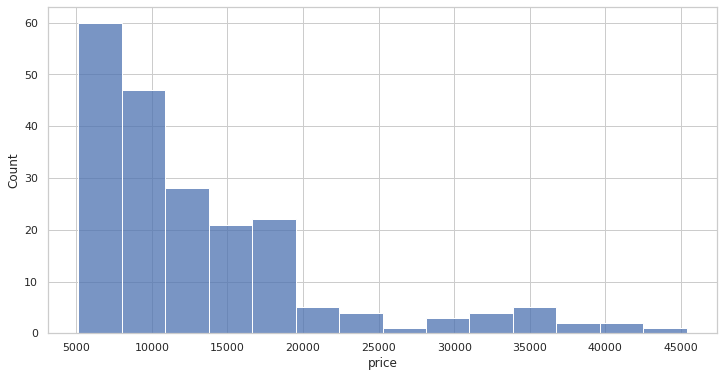

In [76]:
sns.histplot(y)

In [77]:
y_log = np.log(y)
y_log

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

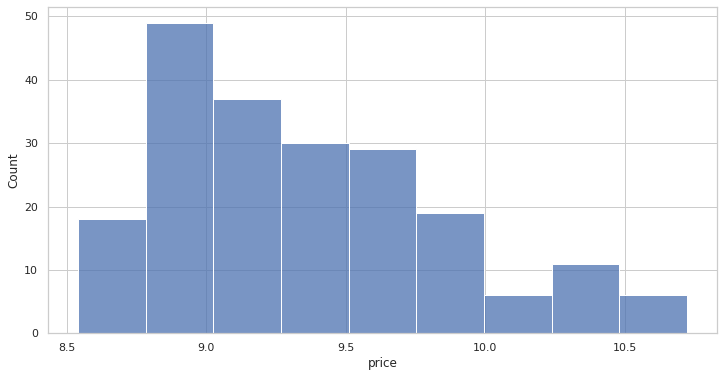

In [78]:
sns.histplot(y_log)

In [79]:
model_log = sm.OLS(y_log, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     83.72
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           7.19e-86
Time:                        10:34:04   Log-Likelihood:                 114.85
No. Observations:                 205   AIC:                            -175.7
Df Residuals:                     178   BIC:                            -85.99
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.22

### Use generalized linear model

In [80]:
model_gamma = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log())).fit()
print(model_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  205
Model:                            GLM   Df Residuals:                      178
Model Family:                   Gamma   Df Model:                           26
Link Function:                    log   Scale:                        0.022463
Method:                          IRLS   Log-Likelihood:                -1805.0
Date:                Wed, 05 Apr 2023   Deviance:                       3.9369
Time:                        10:34:04   Pearson chi2:                     4.00
No. Iterations:                    12   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.19